# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [17]:
import pandas as pd

tabela= pd.read_csv("advertising.csv")

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

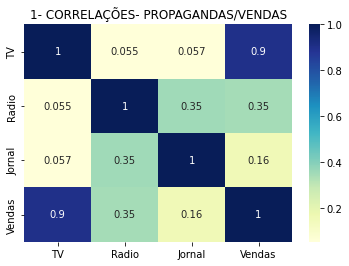

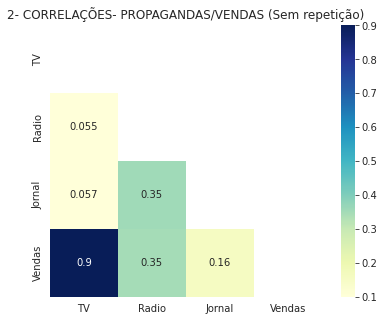

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

''' GRÁFICO SIMPLES'''

sns.heatmap(tabela.corr(), annot=True, cmap="YlGnBu")

plt.title("1- CORRELAÇÕES- PROPAGANDAS/VENDAS") 

'''GRÁFICO PARA MELHOR VISUALIZAÇÃO'''

corr= tabela.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmin=.1, square=True, cmap= "YlGnBu", annot=True)


plt.title("2- CORRELAÇÕES- PROPAGANDAS/VENDAS (Sem repetição)")    


plt.show()



#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [19]:
y = tabela ["Vendas"]

x = tabela [["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_teste = train_test_split(x, y, test_size=0.3)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear= LinearRegression()
modelo_arvoredecisao= RandomForestRegressor()

modelo_regressaolinear.fit (x_treino, y_treino)
modelo_arvoredecisao.fit (x_treino, y_treino)



RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [27]:
previsao_regressaolinear= modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao= modelo_arvoredecisao.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))

print(r2_score(y_teste, previsao_arvoredecisao))

0.900706764239504
0.9434068366823701


#### Visualização Gráfica das Previsões

<function matplotlib.pyplot.show(close=None, block=None)>

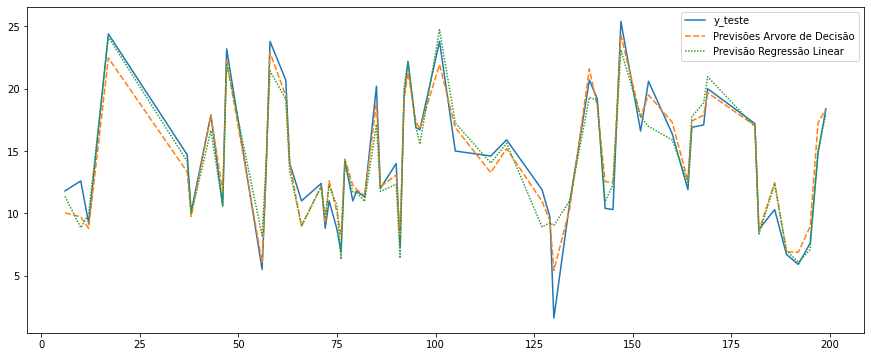

In [22]:
tabela_auxiliar = pd.DataFrame()

tabela_auxiliar["y_teste"] = y_teste

tabela_auxiliar ["Previsões Arvore de Decisão"] = previsao_arvoredecisao

tabela_auxiliar ["Previsão Regressão Linear"] = previsao_regressaolinear

plt.figure (figsize = (15, 6))

sns.lineplot(data=tabela_auxiliar)

plt.show

#### Como fazer uma nova previsão?

In [ ]:
tabela ["Resultados próximos meses"] 



TESTE PARA APRENDER A USAR TÍTULO DE EIXOS

In [23]:
'''#TESTE
fake = pd.DataFrame({'cat': ['red', 'green', 'blue'], 'val': [1, 2, 3]})
ax = sns.lineplot(x = 'val', y = 'cat', 
              data = fake, 
              color = 'black')
ax.set(xlabel='BELEZA xlabel', ylabel='URIS ylabel')
plt.show()'''

"#TESTE\nfake = pd.DataFrame({'cat': ['red', 'green', 'blue'], 'val': [1, 2, 3]})\nax = sns.lineplot(x = 'val', y = 'cat', \n              data = fake, \n              color = 'black')\nax.set(xlabel='BELEZA xlabel', ylabel='URIS ylabel')\nplt.show()"